In [16]:
import glob
import os

import numpy as np
import torch
from sklearn import metrics, model_selection, preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

import config
import dataset

In [17]:
os.chdir('/Users/wuihee/Desktop/Programming/Scripts/CAPTCHA Solver/src')
image_files = glob.glob(os.path.abspath(os.path.join(config.DATA_DIR, "*.png")))

# "/.../.../abcd.png" -> Grabbing the answers of the captcha.
targets_orig = [x.split('\\')[-1][:-4] for x in image_files]

# "abcd" -> ['a', 'b', 'c', 'd']
targets = [[c for c in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]

# Label encoder.
lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)
targets_enc = [lbl_enc.transform(x) for x in targets]
targets_enc = np.array(targets_enc) + 1

(
    train_imgs,
    test_imgs,
    train_targets,
    test_targets,
    train_orig_targets,
    test_orig_targets
) = model_selection.train_test_split(image_files, targets_enc, targets_orig, test_size=0.1, random_state=42)

train_dataset = dataset.ClassificationDataset(image_paths=train_imgs, targets=train_targets, resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


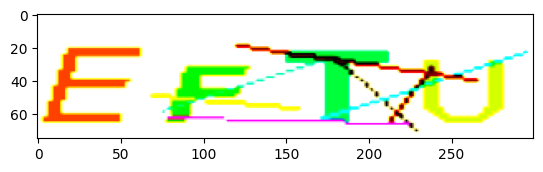

In [26]:
npimg = train_dataset[10]["images"].numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))